## Import libraries

In [1]:
import os
import pandas as pd
from google.colab import drive

## Configure Project Path and other paths

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
proj_path = '/content/drive/MyDrive/Magnimind/Face_detection/Dlib/HOG_based'
os.chdir(proj_path)

In [4]:
train_csv_path = os.path.join(proj_path, 'train_2D.csv')
test_csv_path = os.path.join(proj_path, 'test_2D.csv')

## Read data from csv to pandas dataframe

In [5]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [6]:
train_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_1_x,landmark_1_y,landmark_2_x,landmark_2_y,landmark_3_x,...,landmark_63_x,landmark_63_y,landmark_64_x,landmark_64_y,landmark_65_x,landmark_65_y,landmark_66_x,landmark_66_y,landmark_67_x,landmark_67_y
0,/content/drive/MyDrive/Magnimind/Face_detectio...,839,Autistic,0.165049,0.376569,0.169903,0.464435,0.179612,0.548117,0.184466,...,0.553398,0.723849,0.650485,0.702929,0.548544,0.774059,0.504854,0.778243,0.461165,0.765690
1,/content/drive/MyDrive/Magnimind/Face_detectio...,825,Autistic,0.227119,0.524691,0.240678,0.592593,0.254237,0.657407,0.274576,...,0.586441,0.753086,0.654237,0.762346,0.589831,0.783951,0.559322,0.787037,0.528814,0.780864
2,/content/drive/MyDrive/Magnimind/Face_detectio...,817,Autistic,0.092511,0.498168,0.110132,0.578755,0.132159,0.652015,0.154185,...,0.466960,0.758242,0.572687,0.772894,0.466960,0.820513,0.427313,0.824176,0.383260,0.813187
3,/content/drive/MyDrive/Magnimind/Face_detectio...,845,Autistic,0.153169,0.513055,0.161972,0.593995,0.176056,0.672324,0.193662,...,0.575704,0.802872,0.665493,0.809399,0.579225,0.869452,0.528169,0.873368,0.477113,0.866841
4,/content/drive/MyDrive/Magnimind/Face_detectio...,844,Autistic,0.174515,0.582500,0.196676,0.655000,0.224377,0.725000,0.252078,...,0.562327,0.787500,0.653740,0.770000,0.567867,0.820000,0.531856,0.832500,0.495845,0.835000


In [7]:
test_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_1_x,landmark_1_y,landmark_2_x,landmark_2_y,landmark_3_x,...,landmark_63_x,landmark_63_y,landmark_64_x,landmark_64_y,landmark_65_x,landmark_65_y,landmark_66_x,landmark_66_y,landmark_67_x,landmark_67_y
0,/content/drive/MyDrive/Magnimind/Face_detectio...,100,Autistic,0.098039,0.454128,0.122549,0.564220,0.142157,0.674312,0.181373,...,0.750000,0.752294,0.813725,0.756881,0.750000,0.761468,0.720588,0.766055,0.686275,0.766055
1,/content/drive/MyDrive/Magnimind/Face_detectio...,108,Autistic,0.059524,0.483871,0.083333,0.575269,0.101190,0.661290,0.125000,...,0.511905,0.720430,0.619048,0.720430,0.517857,0.833333,0.464286,0.849462,0.410714,0.844086
2,/content/drive/MyDrive/Magnimind/Face_detectio...,1,Autistic,0.073427,0.444586,0.069930,0.526115,0.069930,0.607643,0.082168,...,0.493007,0.774522,0.617133,0.791083,0.487762,0.830573,0.438811,0.831847,0.382867,0.821656
3,/content/drive/MyDrive/Magnimind/Face_detectio...,103,Autistic,0.157068,0.396018,0.136126,0.464602,0.123037,0.535398,0.109948,...,0.395288,0.752212,0.492147,0.767699,0.390052,0.752212,0.356021,0.747788,0.327225,0.738938
4,/content/drive/MyDrive/Magnimind/Face_detectio...,107,Autistic,0.104072,0.327068,0.108597,0.436090,0.122172,0.541353,0.149321,...,0.674208,0.729323,0.782805,0.710526,0.669683,0.774436,0.610860,0.789474,0.552036,0.781955


In [8]:
train_df['label'].value_counts()

Autistic        1139
Non_Autistic     735
Name: label, dtype: int64

In [9]:
train_df[train_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_1_x,landmark_1_y,landmark_2_x,landmark_2_y,landmark_3_x,...,landmark_63_x,landmark_63_y,landmark_64_x,landmark_64_y,landmark_65_x,landmark_65_y,landmark_66_x,landmark_66_y,landmark_67_x,landmark_67_y


In [10]:
test_df['label'].value_counts()

Non_Autistic    140
Autistic        134
Name: label, dtype: int64

In [11]:
test_df[test_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_1_x,landmark_1_y,landmark_2_x,landmark_2_y,landmark_3_x,...,landmark_63_x,landmark_63_y,landmark_64_x,landmark_64_y,landmark_65_x,landmark_65_y,landmark_66_x,landmark_66_y,landmark_67_x,landmark_67_y


## Setting input features and output features

In [12]:
X = train_df.drop(columns=['img_path', 'image_num', 'label'])
y = train_df['label']

In [13]:
y.value_counts()

Autistic        1139
Non_Autistic     735
Name: label, dtype: int64

In [14]:
y = y.map({'Autistic': 1, 'Non_Autistic': 0})

In [15]:
y.value_counts()

1    1139
0     735
Name: label, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state=100)

In [17]:
X_test = test_df.drop(columns=['img_path', 'image_num', 'label'])
y_test = test_df['label']
y_test = y_test.map({'Autistic': 1, 'Non_Autistic': 0})

## PCA transformation applied on input data

In [18]:
from sklearn.decomposition import PCA

# Dimensionality reduction using PCA

# Totally there are 936 features.
# We select the following number of features for checking the explained variance.
components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
exp_var = []

# Find the optimal number of components for dimensionality reduction.
for comp in components:
    pca = PCA(n_components=comp)
    pca.fit(X_train)
    var_exp = pca.explained_variance_ratio_.sum()
    exp_var.append(var_exp)


In [19]:
import matplotlib.pyplot as plt

def plt_explained_variance(x=components, y=exp_var):
    fig, ax = plt.subplots(figsize=(6,3))
    plt.plot(x, y)
    plt.xlabel('Number of components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance')
    for index in range(len(x)):
        ax.text(x[index], y[index], round(y[index],2), size=12)

    plt.show()

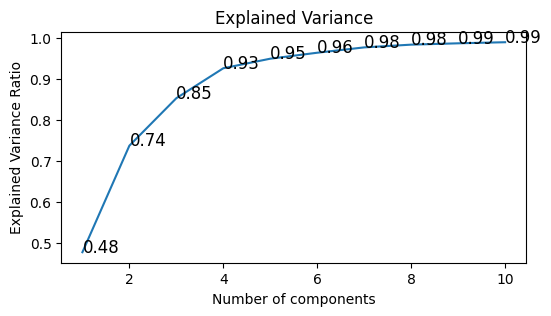

In [20]:
plt_explained_variance(components, exp_var)

In [21]:
num_components = 7

## Model Building

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier


In [23]:
# Initializing random_state
random_state = 100

In [24]:
# Pipelines defined for multiple models
normal_pipeline = {
    # Base models
    'LR':   Pipeline([('LR', LogisticRegression(random_state=random_state,
                                                max_iter=2000,
                                                class_weight='balanced'))]),
    'RF':   Pipeline([('RF', RandomForestClassifier(random_state=random_state,
                                                    class_weight='balanced'))]),
    'ADB':  Pipeline([('ADB', AdaBoostClassifier(random_state=random_state))]),
    'XGB':  Pipeline([('XGB', XGBClassifier(random_state=random_state))]),
    'MLP':  Pipeline([('MLP', MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128, 64, 32, 16),
                                            max_iter=3000,
                                            activation='relu',
                                            random_state=random_state))]),
}

In [25]:
# PCA pipeline
pca_pipeline = {
    'PCA and LR':   Pipeline([('PCA', PCA(n_components=num_components)),
                              ('LR', LogisticRegression(random_state=random_state,
                                                        max_iter=2000,
                                                        class_weight='balanced'))]),
    'PCA and RF':   Pipeline([('PCA', PCA(n_components=num_components)),
                              ('RF', RandomForestClassifier(random_state=random_state,
                                                            class_weight='balanced'))]),
    'PCA and ADB':  Pipeline([('PCA', PCA(n_components=num_components)),
                              ('ADB', AdaBoostClassifier(random_state=random_state))]),
    'PCA and XGB':  Pipeline([('PCA', PCA(n_components=num_components)),
                              ('XGB', XGBClassifier(random_state=random_state))]),

    'PCA and MLP':  Pipeline([('PCA', PCA(n_components=num_components)),
                              ('MLP', MLPClassifier(hidden_layer_sizes=(1024,
                                                                        512,
                                                                        256,
                                                                        128,
                                                                        64,
                                                                        32,
                                                                        16),
                                                    max_iter=3000,
                                                    activation='relu',
                                                    random_state=random_state))]),

}

In [26]:
# SMOTE pipeline
smote_pipeline = {
    'SMOTE and LR':   make_pipeline(SMOTE(),
                                    LogisticRegression(random_state=random_state,
                                                        max_iter=2000,
                                                        class_weight='balanced')),
    'SMOTE and RF':   make_pipeline(SMOTE(),
                                    RandomForestClassifier(random_state=random_state,
                                                            class_weight='balanced')),
    'SMOTE and ADB':  make_pipeline(SMOTE(),
                                    AdaBoostClassifier(random_state=random_state)),
    'SMOTE and XGB':  make_pipeline(SMOTE(),
                                    XGBClassifier(random_state=random_state)),
    'SMOTE and MLP':  make_pipeline(SMOTE(),
                                    MLPClassifier(hidden_layer_sizes=(1024,
                                                                      512,
                                                                      256,
                                                                      128,
                                                                      64,
                                                                      32,
                                                                      16),
                                                  max_iter=3000,
                                                  activation='relu',
                                                  random_state=random_state)),
}

In [27]:
# Evaluate the fitted pipeline
def evaluate(pipeline, X, y):
    # Predict on given X
    y_pred = pipeline.predict(X)

    # Calculate below evaluation metrics
    accuracy = round(accuracy_score(y, y_pred), 2)
    precision = round(precision_score(y, y_pred), 2)
    recall = round(recall_score(y, y_pred), 2)
    f1 = round(f1_score(y, y_pred), 2)

    # Return the values in a dictionary
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, 'F1': f1}

In [28]:
model_pipelines = [normal_pipeline, pca_pipeline, smote_pipeline]
for model_pipeline in model_pipelines:
    for name, pipe in model_pipeline.items():
        print(f'Training the pipeline: {name}')
        pipe.fit(X_train, y_train)

Training the pipeline: LR
Training the pipeline: RF
Training the pipeline: ADB
Training the pipeline: XGB
Training the pipeline: MLP
Training the pipeline: PCA and LR
Training the pipeline: PCA and RF
Training the pipeline: PCA and ADB
Training the pipeline: PCA and XGB
Training the pipeline: PCA and MLP
Training the pipeline: SMOTE and LR
Training the pipeline: SMOTE and RF
Training the pipeline: SMOTE and ADB
Training the pipeline: SMOTE and XGB
Training the pipeline: SMOTE and MLP


In [29]:
result = []

In [30]:
for model_pipeline in model_pipelines:
    for name, pipe in model_pipeline.items():
        print(f'Evaluating the pipeline: {name}')
        train_metrics = evaluate(pipe, X_train, y_train)
        val_metrics = evaluate(pipe, X_val, y_val)
        test_metrics = evaluate(pipe, X_test, y_test)
        train_metrics['model'] = name + ' Train'
        val_metrics['model'] = name + ' Validation'
        test_metrics['model'] = name + ' Test'

        result.append(train_metrics)
        result.append(val_metrics)
        result.append(test_metrics)

Evaluating the pipeline: LR
Evaluating the pipeline: RF
Evaluating the pipeline: ADB
Evaluating the pipeline: XGB
Evaluating the pipeline: MLP
Evaluating the pipeline: PCA and LR
Evaluating the pipeline: PCA and RF
Evaluating the pipeline: PCA and ADB
Evaluating the pipeline: PCA and XGB
Evaluating the pipeline: PCA and MLP
Evaluating the pipeline: SMOTE and LR
Evaluating the pipeline: SMOTE and RF
Evaluating the pipeline: SMOTE and ADB
Evaluating the pipeline: SMOTE and XGB
Evaluating the pipeline: SMOTE and MLP


In [31]:
result_df = pd.DataFrame(result).set_index('model')
result_df

,Accuracy,Precision,Recall,F1
model,,,,
LR Train,0.73,0.81,0.74,0.77
LR Validation,0.66,0.75,0.66,0.70
LR Test,0.70,0.69,0.68,0.69
RF Train,1.00,1.00,1.00,1.00
RF Validation,0.72,0.74,0.82,0.78
RF Test,0.70,0.65,0.86,0.74
ADB Train,0.82,0.83,0.89,0.86
ADB Validation,0.71,0.76,0.76,0.76
ADB Test,0.69,0.64,0.81,0.72


In [33]:
df_temp = result_df.copy()

# Extract the models in order from the original DataFrame
model_order = result_df.index.str.rsplit(pat=' ', n=1).str[0].drop_duplicates().tolist()

df_temp['Model'] = df_temp.index.str.rsplit(pat=' ', n=1).str[0]
df_temp['Split'] = df_temp.index.str.rsplit(pat=' ', n=1).str[1]
# Reset the index
df_temp = df_temp.reset_index(drop=True)

final_df = df_temp.pivot_table(index='Model',
                               columns='Split',
                               values=['Accuracy', 'Precision', 'Recall', 'F1'])
final_df = final_df[[
    ('Accuracy', 'Train'),
    ('Accuracy', 'Validation'),
    ('Accuracy', 'Test'),
    ('Precision', 'Train'),
    ('Precision', 'Validation'),
    ('Precision', 'Test'),
    ('Recall', 'Train'),
    ('Recall', 'Validation'),
    ('Recall', 'Test'),
    ('F1', 'Train'),
    ('F1', 'Validation'),
    ('F1', 'Test')
]]

# Reorder the rows to match the order in model_order
final_df = final_df.reindex(model_order)

In [34]:
final_df

Accuracy                  Precision                  Recall  \
Split            Train Validation  Test     Train Validation  Test  Train   
Model                                                                       
LR                0.73       0.66  0.70      0.81       0.75  0.69   0.74   
RF                1.00       0.72  0.70      1.00       0.74  0.65   1.00   
ADB               0.82       0.71  0.69      0.83       0.76  0.64   0.89   
XGB               1.00       0.71  0.70      1.00       0.75  0.65   1.00   
MLP               0.71       0.69  0.63      0.74       0.74  0.59   0.81   
PCA and LR        0.73       0.65  0.70      0.81       0.75  0.69   0.73   
PCA and RF        1.00       0.75  0.68      1.00       0.77  0.62   1.00   
PCA and ADB       0.78       0.69  0.69      0.80       0.74  0.65   0.85   
PCA and XGB       1.00       0.71  0.66      1.00       0.74  0.63   1.00   
PCA and MLP       0.83       0.68  0.68      0.86       0.75  0.65   0.85   
SMOTE and LR      0.74       0.66  0.71      0.81       0.75  0.70   0.74   
SMOTE and RF      1.00       0.72  0.68      1.00       0.77  0.64   1.00   
SMOTE and ADB     0.81       0.69  0.68      0.87       0.77  0.67   0.82   
SMOTE and XGB     1.00       0.71  0.70      1.00       0.76  0.66   1.00   
SMOTE and MLP     0.75       0.72  0.66      0.75       0.74  0.61   0.88   

                                  F1                   
Split         Validation  Test Train Validation  Test  
Model                                                  
LR                  0.66  0.68  0.77       0.70  0.69  
RF                  0.82  0.86  1.00       0.78  0.74  
ADB                 0.76  0.81  0.86       0.76  0.72  
XGB                 0.78  0.83  1.00       0.76  0.73  
MLP                 0.76  0.77  0.77       0.75  0.67  
PCA and LR          0.64  0.70  0.77       0.69  0.70  
PCA and RF          0.85  0.84  1.00       0.81  0.72  
PCA and ADB         0.75  0.80  0.82       0.75  0.72  
PCA and XGB         0.80  0.73  1.00       0.77  0.68  
PCA and MLP         0.70  0.75  0.86       0.72  0.69  
SMOTE and LR        0.66  0.70  0.77       0.70  0.70  
SMOTE and RF        0.78  0.77  1.00       0.77  0.70  
SMOTE and ADB       0.70  0.70  0.84       0.74  0.68  
SMOTE and XGB       0.77  0.78  1.00       0.77  0.71  
SMOTE and MLP       0.83  0.86  0.81       0.78  0.71

In [35]:
# Save the results to an excel file
results_path = os.path.join(proj_path, "..", "Dlib_results.xlsx")

# Find proper mode
if os.path.exists(results_path):
    mode = 'a'  # append mode
else:
    mode = 'w'  # write mode

# Save the contents of final_df to Excel
with pd.ExcelWriter(results_path, engine='openpyxl', mode=mode) as excel_writer:
    final_df.to_excel(excel_writer, sheet_name='Results_HOG_based')